https://thefiddler.substack.com/p/a-pi-day-puzzle

# Fiddler
You are planning a picnic on the remote tropical island of 𝜋-land. The island’s shape is a perfect semi-disk with two beaches, as illustrated below: Semicircular Beach (along the northern semicircular edge of the disk) and Diametric Beach (along the southern diameter of the disk).


# Fiddler Extra Credit
Suppose the island of 𝜋-land, as described above, has a radius of 1 mile. That is, Diametric Beach has a length of 2 miles.

Again, you are picking a random point on the island for a picnic. On average, what will be the expected shortest distance to shore?

<img src="https://substackcdn.com/image/fetch/w_1456,c_limit,f_webp,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F7b37c0ce-2e98-4943-8c8a-d0f61bb6df8f_926x574.png"/>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.neighbors import NearestNeighbors

Set the Number of Circle and Trial Points

In [2]:
CIRCLE_POINTS = 10**6
TRIAL_POINTS = 10**7

Set the Radius of the Semicircle

In [3]:
rad = 1
neg_rad = rad * -1

Function to Create a Semicircle [link](https://stackoverflow.com/questions/69185636/how-to-plot-the-equation-for-a-semicircle)

In [4]:
def semicircle(r, h, k, n = 10**6):
    x0 = h - r
    x1 = h + r
    x = np.linspace(x0, x1, n)

    y = k + np.sqrt(r**2 - (x - h)**2)
    return x, y

Create the Semicircle and KNN Class

In [5]:
x, y = semicircle(rad, 0, 0, CIRCLE_POINTS)
coord_set = np.column_stack((x, y))
nn = NearestNeighbors(n_neighbors=1, algorithm="kd_tree", n_jobs=-1)
nn.fit(coord_set)

NearestNeighbors(algorithm='kd_tree', n_jobs=-1, n_neighbors=1)

1. Create a set of Random X-Y Coordinates
2. Filter to those Coords that will fit inside the Semicircle

In [6]:
big_x_set = np.random.uniform(low=neg_rad, high=rad, size=TRIAL_POINTS)
big_y_set = np.random.uniform(low=0, high=rad, size=TRIAL_POINTS)
inside_arc = big_x_set ** 2 + big_y_set ** 2 <= rad ** 2

x_set = big_x_set[inside_arc]
y_set = big_y_set[inside_arc]

xy_points = np.column_stack((x_set, y_set))

Determine the distance of each X-Y Coord to the nearest point on the Semicircle

In [7]:
arc_distances = nn.kneighbors(xy_points)[0]
arc_distances = np.ravel(arc_distances)

1. Determine if the distance to the diameter is shorter than the distance to the semicircle
2. Capture the distance based on whichever is shorter

In [8]:
testers = y_set < arc_distances
shore_distances = np.minimum(y_set, arc_distances)

Compute and Display the Odds any Point is Closer to the Diameter than the Semicircle

In [9]:
odds = np.mean(testers)
print(f"Closer to Diametric Beach -> {odds:.2%}")

Closer to Diametric Beach -> 42.44%


$$
42.44\%	\longleftrightarrow \frac{4}{3\pi}
$$

Compute and Display the Average Distance to Shore

In [10]:
mn_dist = np.mean(shore_distances)
print(f"Average Distance to Shore: {mn_dist:.2f} miles")

Average Distance to Shore: 0.19 miles


$$
0.19 \text{ miles} \longleftrightarrow \frac{r(3\pi - 4)}{9\pi}
$$

Plot the Results

In [11]:
color_array = np.where(testers, "green", "blue")

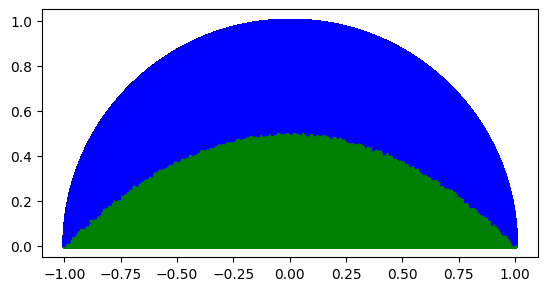

In [12]:
plt.clf()
plt.scatter(x, y, s=2, c="black")
plt.scatter(x_set, y_set, s=2, c=color_array, marker=",", linewidths=None)
plt.gca().set_aspect("equal", adjustable="box")

https://thefiddler.substack.com/p/can-you-play-the-favorite

https://www.davidyding.com/navPages/PiDay2025